### Decision Tree Example

### 라이브러리 선언

In [1]:
import numpy as np
import pandas as pd 

# 모델 라이브러리 선언
from sklearn import datasets, tree

# 모델 정확도 라이브러리 선언
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# CSV 파일을 읽어 DataFrame 변수에 저장하기
featuresData = pd.read_csv("../dataset./feature_regression_example.csv")
featuresData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155


### [실습] 1. 타입통합 및 특성숫자 타입 변환

In [2]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [3]:
# 데이터 타입 표준화
featuresData["YEARWEEK"] = featuresData.YEARWEEK.astype(int)
featuresData["YEAR"] = featuresData.YEARWEEK.astype(int)
featuresData["WEEK"] = featuresData.YEARWEEK.astype(int)

In [4]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int32
YEAR              int32
WEEK              int32
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [5]:
# 특성 타입 추가
featuresData["HO_YN"] = np.where(featuresData.HOLIDAY == "Y", 1,0)
featuresData["PRO_YN"] = np.where(featuresData.PROMOTION == "Y", 1,0)
featuresData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,201501,201501,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,201502,201502,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,201503,201503,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,201504,201504,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,201505,201505,1773,N,4,Y,0.208155,0,1


##### 다른풀이 방식 1 (get_dummies)

In [6]:
pd.concat([featuresData, 
           pd.get_dummies(prefix="PROMO",
                          data = featuresData.PROMOTION)],
          axis=1).head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,PROMO_N,PROMO_Y
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,201501,201501,1225,Y,1,Y,0.209442,1,1,False,True
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,201502,201502,968,N,4,Y,0.209442,0,1,False,True


##### 다른풀이 방식 2 (sklearn)

In [7]:
from sklearn.preprocessing import LabelEncoder
le_pro = LabelEncoder()
le_holy = LabelEncoder()
featuresData['PRO_ENCO'] = \
            le_pro.fit_transform(featuresData.PROMOTION)
featuresData['HOLY_ENCO'] = \
            le_holy.fit_transform(featuresData.HOLIDAY)
### le_holy.inverse_transform

In [8]:
#dict(featuresData[["PRO_ENCO","PROMOTION"]].drop_duplicates().values)

In [9]:
featuresData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,PRO_ENCO,HOLY_ENCO
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,201501,201501,1225,Y,1,Y,0.209442,1,1,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,201502,201502,968,N,4,Y,0.209442,0,1,1,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,201503,201503,1209,N,4,Y,0.208155,0,1,1,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,201504,201504,1810,Y,2,Y,0.208155,1,1,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,201505,201505,1773,N,4,Y,0.208155,0,1,1,0


In [10]:
from sklearn.preprocessing import OneHotEncoder
pro_ohe = OneHotEncoder()
onehot = pd.DataFrame(pro_ohe.fit_transform(
    featuresData.PRO_ENCO.values.reshape(-1,1)).toarray())

In [11]:
onehot.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


##### 다른풀이 방식 3 (dictionary mapping)

In [12]:
binarymap = {"Y":1, "N":0}

featuresData["PRO_DICT"] = featuresData.PROMOTION.map(binarymap)
featuresData.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,PRO_ENCO,HOLY_ENCO,PRO_DICT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,201501,201501,1225,Y,1,Y,0.209442,1,1,1,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,201502,201502,968,N,4,Y,0.209442,0,1,1,0,1


In [13]:
# 데이터 조회
featuresData = featuresData[ (featuresData.YEARWEEK >= 201501) & \
                             (featuresData.YEARWEEK <= 201652)]
featuresData.head()
print(featuresData.YEARWEEK.min())
print(featuresData.YEARWEEK.max())

201501
201652


### 2. 특성선정 및 데이터 분리

In [14]:
corrDf = featuresData.select_dtypes(np.number).corr()

In [15]:
# 상관관계 확인
corrDf.head()

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN,PRO_ENCO,HOLY_ENCO,PRO_DICT
YEARWEEK,1.000000,1.000000,1.000000,0.112267,-0.071586,0.404889,0.049867,0.205916,0.205916,0.049867,0.205916
YEAR,1.000000,1.000000,1.000000,0.112267,-0.071586,0.404889,0.049867,0.205916,0.205916,0.049867,0.205916
WEEK,1.000000,1.000000,1.000000,0.112267,-0.071586,0.404889,0.049867,0.205916,0.205916,0.049867,0.205916
QTY,0.112267,0.112267,0.112267,1.000000,-0.537230,0.700195,0.505932,0.612451,0.612451,0.505932,0.612451
HCLUS,-0.071586,-0.071586,-0.071586,-0.537230,1.000000,-0.545619,-0.974601,-0.374072,-0.374072,-0.974601,-0.374072


In [16]:
# 인덱스컬럼 초기화
corrResult = corrDf.reset_index()

In [17]:
corrResult

,index,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN,PRO_ENCO,HOLY_ENCO,PRO_DICT
0,YEARWEEK,1.000000,1.000000,1.000000,0.112267,-0.071586,0.404889,0.049867,0.205916,0.205916,0.049867,0.205916
1,YEAR,1.000000,1.000000,1.000000,0.112267,-0.071586,0.404889,0.049867,0.205916,0.205916,0.049867,0.205916
2,WEEK,1.000000,1.000000,1.000000,0.112267,-0.071586,0.404889,0.049867,0.205916,0.205916,0.049867,0.205916
3,QTY,0.112267,0.112267,0.112267,1.000000,-0.537230,0.700195,0.505932,0.612451,0.612451,0.505932,0.612451
4,HCLUS,-0.071586,-0.071586,-0.071586,-0.537230,1.000000,-0.545619,-0.974601,-0.374072,-0.374072,-0.974601,-0.374072
5,PRO_PERCENT,0.404889,0.404889,0.404889,0.700195,-0.545619,1.000000,0.487062,0.898554,0.898554,0.487062,0.898554
6,HO_YN,0.049867,0.049867,0.049867,0.505932,-0.974601,0.487062,1.000000,0.365148,0.365148,1.000000,0.365148
7,PRO_YN,0.205916,0.205916,0.205916,0.612451,-0.374072,0.898554,0.365148,1.000000,1.000000,0.365148,1.000000
8,PRO_ENCO,0.205916,0.205916,0.205916,0.612451,-0.374072,0.898554,0.365148,1.000000,1.000000,0.365148,1.000000
9,HOLY_ENCO,0.049867,0.049867,0.049867,0.505932,-0.974601,0.487062,1.000000,0.365148,0.365148,1.000000,0.365148


In [18]:
# 상관관계 계수 비율 선정
featuresStd = 0.6

In [19]:
# Feature 선택
features = corrResult[ (corrResult.QTY != 1) & 
            (abs(corrResult.QTY) > featuresStd)]["index"].tolist()
features

['PRO_PERCENT', 'PRO_YN', 'PRO_ENCO', 'PRO_DICT']

In [20]:
label = ['QTY']
label

['QTY']

In [21]:
features

['PRO_PERCENT', 'PRO_YN', 'PRO_ENCO', 'PRO_DICT']

In [22]:
# 데이터 분리
yearweekStd = 201630

trainingData_features = featuresData[featuresData.YEARWEEK <= yearweekStd][features]
trainingData_label = featuresData[featuresData.YEARWEEK <= yearweekStd][label]
testData_features = featuresData[featuresData.YEARWEEK > yearweekStd][features]
testData_label = featuresData[featuresData.YEARWEEK > yearweekStd]

[실습]
데이터를 YEARWEEK기준으로 오름차순 정렬한후
80% 20%로 나누어 위에서 작업한 내용을 연산하세요

In [23]:
div = 0.8

In [24]:
std = int(len(featuresData["YEARWEEK"])*div)
std

84

In [25]:
trainingData_features =featuresData.iloc[0:std-1,][features]
trainingData_label =featuresData.iloc[0:std-1,][label]
testData_features = featuresData.iloc[std:,][features]
testData_label = featuresData.iloc[std:,]

# 3. 모델선언 및 학습

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [27]:
model_method = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=1)

In [28]:
# rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
# rf.fit(X_train, y_train)

In [29]:
# Define Model depth= 100~200
#model_method = tree.DecisionTreeRegressor(random_state=1)

In [30]:
# Learning (Feature & Label)
model = model_method.fit(trainingData_features, trainingData_label)

C:\Users\kopo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [31]:
model

RandomForestRegressor(oob_score=True, random_state=1)

# 4. 예측

In [32]:
predict = model.predict(testData_features)

In [33]:
predict

array([2450.87654824,  340.68471348, 1459.29549278, 1459.29549278,
       1459.29549278, 1459.29549278, 1459.29549278, 2450.87654824,
       2450.87654824, 2450.87654824, 2450.87654824,  340.68471348,
       2177.87920707, 2177.87920707, 2177.87920707, 2177.87920707,
       2177.87920707, 2177.87920707, 2177.87920707, 2177.87920707,
       2177.87920707])

### [실습] 5. 데이터 정리

In [34]:
### 데이터프레임으로 변환
predictData = pd.DataFrame(predict)

In [35]:
### 컬럼명 주입
predictData.columns = ["PREDICT"]
predictData.head()

,PREDICT
0,2450.876548
1,340.684713
2,1459.295493
3,1459.295493
4,1459.295493


In [36]:
### 테스트데이터 인덱스 초기화
testDataFinal = testData_label.reset_index(drop=True)
testDataFinal.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,PRO_ENCO,HOLY_ENCO,PRO_DICT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,201632,201632,2100,N,4,Y,0.280258,0,1,1,0,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,201633,201633,43,N,4,N,0.000000,0,0,0,0,0


In [37]:
### 컬럼 붙이기 (index 끼리)
finalResult = pd.concat([testDataFinal, predictData], axis = 1)
finalResult.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,PRO_ENCO,HOLY_ENCO,PRO_DICT,PREDICT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,201632,201632,2100,N,4,Y,0.280258,0,1,1,0,1,2450.876548
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,201633,201633,43,N,4,N,0.000000,0,0,0,0,0,340.684713


# 6. 정확도 측정

In [38]:
import math

In [39]:
mean_absolute_error(finalResult['QTY'], finalResult['PREDICT'])  

424.06008215100945

In [40]:
math.sqrt(mean_squared_error(finalResult['QTY'], finalResult['PREDICT']) )

578.3733845695597

In [41]:
r2_score(finalResult['QTY'], finalResult['PREDICT'])  

0.31596296041588534

In [42]:
finalResult.to_csv("./supervisedresult.csv")

In [43]:
featuresData2 = featuresData[featuresData.YEARWEEK <= yearweekStd]

### 결과 시각화 및 분석

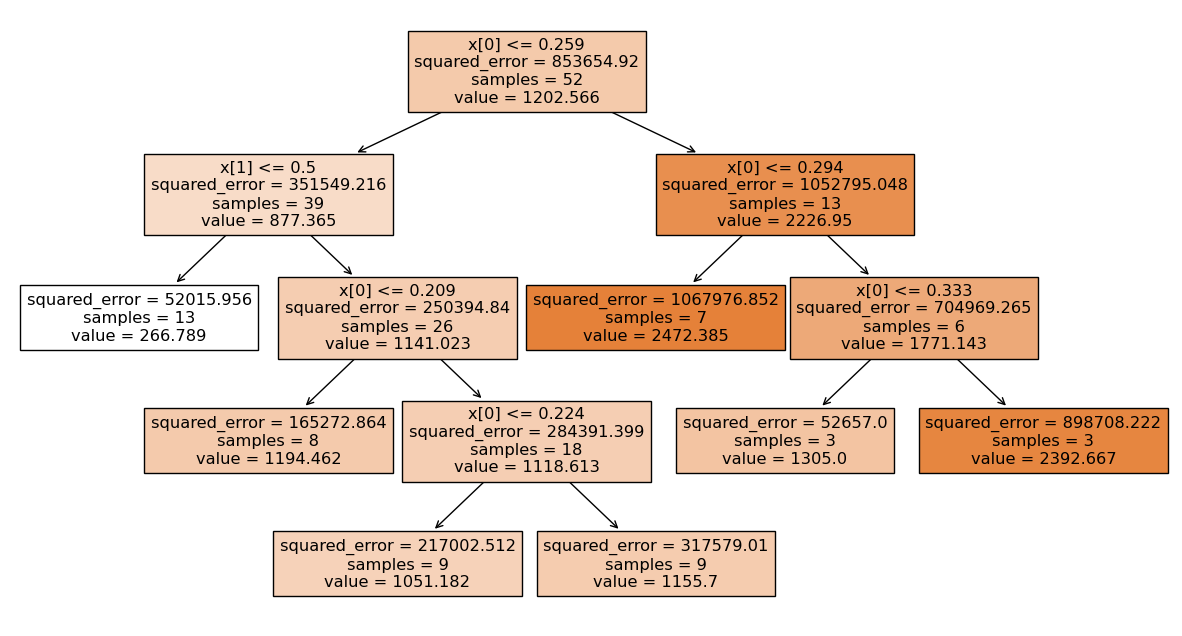

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## Plot Tree with plot_tree
fig = plt.figure(figsize=(15, 8))
graph = tree.plot_tree(model.estimators_[0], 
                  filled=True)

[실습]
기존 데이터를 활용하여
Decision Tree 로직 외에 
Linear Regression 로직으로
구현하세요